In [10]:
import torch
import torchvision
import torchvision.transforms as transforms

from snntorch import spikegen
import snntorch.spikeplot as splt

from IPython.display import HTML
import matplotlib.pyplot as plt

import SPSN.dataset as dataset

batch_size = 256

# Load and normalize CIFAR-10 data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0, 0, 0), (1, 1, 1))])
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])

# train_dataset_mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# train_loader_mnist = torch.utils.data.DataLoader(train_dataset_mnist, batch_size=batch_size, shuffle=True)

images, targets = next(iter(train_loader))

Files already downloaded and verified


In [11]:
def to_rate_encoded_spikes(images, num_steps, max_rate=1.0):
    # Normalize pixel intensities to be in the range of [0, max_rate]
    normalized_images = images * max_rate
    # Generate spike trains: shape [batch_size, num_steps, W * H]
    spike_trains = spikegen.rate(normalized_images, num_steps=num_steps)
    # Reshaping to [batch_size, num_steps, W * H]
    return spike_trains.view(batch_size, num_steps, -1)

In [34]:
spike_train = to_rate_encoded_spikes(images, num_steps=312)
print(spike_train.shape) # [batch_size, num_steps, channels * W * H]

torch.Size([256, 312, 3072])


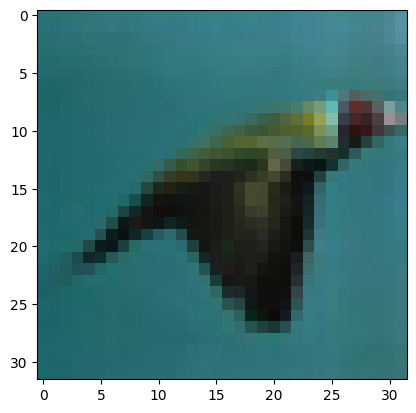

In [33]:
plt.imshow(images[0].permute(1,2,0))